# Scope

This notebook has the following utilities:
1. Read the raw data from multiple cities;
2. Aggregate the information;
3. Understand the dataset;
4. Clean the dataset (drop & transform).

# Import Libraries

In [1]:
import os
import glob

import numpy as np
import pandas as pd

from pathlib import Path
from typing import Tuple, List

# Load Data

First we will take a look only at the Amsterdam city to understand the data structure.

In [2]:
def read_city(city_data_dir: str):
    """
    Reads the data from a single city.

        :param city_data_dir: String path to the directory that contains the listing.csv file.

        :return: DataFrame that contains the data.
    """

    city_data_dir = Path(city_data_dir)

    listings_df = pd.read_csv(city_data_dir / "listings.csv")
    df = listings_df.set_index(keys=["id"])

    return df

In [3]:
amsterdam_df = read_city(city_data_dir="./data/Amsterdam")

In [4]:
amsterdam_df.head()

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
2818,https://www.airbnb.com/rooms/2818,20220308023209,2022-03-08,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,...,4.98,4.68,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.81
20168,https://www.airbnb.com/rooms/20168,20220308023209,2022-03-31,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.30
27886,https://www.airbnb.com/rooms/27886,20220308023209,2022-03-08,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,Flip,...,4.92,4.89,4.79,0363 974D 4986 7411 88D8,t,1,0,1,0,1.84
28871,https://www.airbnb.com/rooms/28871,20220308023209,2022-03-08,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,Edwin,...,4.94,4.97,4.82,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.70
29051,https://www.airbnb.com/rooms/29051,20220308023209,2022-03-08,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,Edwin,...,4.91,4.87,4.75,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.98


In [5]:
amsterdam_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5732 entries, 2818 to 575735254328900114
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   5732 non-null   object 
 1   scrape_id                                     5732 non-null   int64  
 2   last_scraped                                  5732 non-null   object 
 3   name                                          5732 non-null   object 
 4   description                                   5716 non-null   object 
 5   neighborhood_overview                         4054 non-null   object 
 6   picture_url                                   5732 non-null   object 
 7   host_id                                       5732 non-null   int64  
 8   host_url                                      5732 non-null   object 
 9   host_name                                     

In [6]:
amsterdam_df.describe()

,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5.732000e+03,5.732000e+03,5732.000000,5732.000000,0.0,5732.000000,5732.000000,5732.000000,0.0,5405.000000,...,5147.000000,5147.000000,5147.000000,5147.000000,5147.000000,5732.000000,5732.000000,5732.000000,5732.000000,5156.000000
mean,2.022031e+13,9.178522e+07,2.958653,2.958653,NaN,52.366941,4.891896,2.954641,NaN,1.571138,...,4.750567,4.873002,4.880128,4.776318,4.643021,2.205862,1.085311,0.983426,0.024773,1.107719
std,0.000000e+00,1.187621e+08,32.962427,32.962427,NaN,0.017964,0.038285,1.489931,NaN,0.920397,...,0.323958,0.237898,0.247172,0.243932,0.304714,3.127854,1.700549,2.468840,0.248704,2.085598
min,2.022031e+13,3.159000e+03,0.000000,0.000000,NaN,52.277520,4.753340,0.000000,NaN,1.000000,...,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.022031e+13,9.164086e+06,1.000000,1.000000,NaN,52.356277,4.868655,2.000000,NaN,1.000000,...,4.660000,4.840000,4.860000,4.670000,4.530000,1.000000,0.000000,0.000000,0.000000,0.250000
50%,2.022031e+13,3.171299e+07,1.000000,1.000000,NaN,52.366470,4.888655,2.000000,NaN,1.000000,...,4.850000,4.940000,4.960000,4.830000,4.690000,1.000000,1.000000,0.000000,0.000000,0.510000
75%,2.022031e+13,1.377074e+08,2.000000,2.000000,NaN,52.376740,4.909320,4.000000,NaN,2.000000,...,4.970000,5.000000,5.000000,4.970000,4.810000,2.000000,1.000000,1.000000,0.000000,1.192500
max,2.022031e+13,4.478697e+08,2239.000000,2239.000000,NaN,52.430760,5.070100,16.000000,NaN,15.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,20.000000,15.000000,20.000000,4.000000,78.940000


# Now Read All the Cities

In [7]:
def read_all(data_dir: str) -> pd.DataFrame:
    """
    Read and aggregate the data from all the cities.

        :param data_dir: Path to the root directory that contains the city directories (e.g. Amsterdam, Rotterdam, etc.)

        :return: A DataFrame that contains all the data.
    """
    aggregated_df = None
    for city_dir in glob.glob(os.path.join(data_dir, "*")):
        if os.path.isdir(city_dir) and "features" not in city_dir:
            city = os.path.split(city_dir)[-1]
            df = read_city(city_dir)
            df["city"] = city

            if aggregated_df is None:
                aggregated_df = df
            else:
                assert len(set(aggregated_df.index).intersection(set(df.index))) == 0, "Listings overlapped."

                aggregated_df = pd.concat([aggregated_df, df], axis=0)

    return aggregated_df

In [8]:
df = read_all("./data/")

In [9]:
df.head()

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
id,,,,,,,,,,,,,,,,,,,,,
2818,https://www.airbnb.com/rooms/2818,20220308023209,2022-03-08,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,...,4.68,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.81,Amsterdam
20168,https://www.airbnb.com/rooms/20168,20220308023209,2022-03-31,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,...,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.30,Amsterdam
27886,https://www.airbnb.com/rooms/27886,20220308023209,2022-03-08,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,Flip,...,4.89,4.79,0363 974D 4986 7411 88D8,t,1,0,1,0,1.84,Amsterdam
28871,https://www.airbnb.com/rooms/28871,20220308023209,2022-03-08,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,Edwin,...,4.97,4.82,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.70,Amsterdam
29051,https://www.airbnb.com/rooms/29051,20220308023209,2022-03-08,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,Edwin,...,4.87,4.75,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.98,Amsterdam


# Drop Cols

In [10]:
df.isna().sum()

listing_url                                       0
scrape_id                                         0
last_scraped                                      0
name                                              0
description                                      24
                                               ... 
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               793
city                                              0
Length: 74, dtype: int64

### Let's See Which Columns Are Mainly NANs

In [11]:
def drop_columns_with_nans(df: pd.DataFrame, percentage: float) -> Tuple[pd.DataFrame, List[str]]:
    f"""
    Drops columns that have a NANs percentage bigger than {percentage}

        :param df: The DataFrame that we are looking in.
        :param percentage: Percentage threshold used to drop columns with a NAN ratio bigger than it.

        :return: The cleaned DataFrame.
    """

    assert 0 <= percentage <= 1

    nan_percentages = df.isna().mean()
    filtered_nan_percentages = nan_percentages[nan_percentages > percentage]
    to_drop_columns = list(filtered_nan_percentages.index)

    df = df.drop(columns=to_drop_columns).copy()

    return df, to_drop_columns

In [12]:
cleaned_df, dropped_columns = drop_columns_with_nans(df, percentage=0.8)

In [13]:
cleaned_df.head()

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
id,,,,,,,,,,,,,,,,,,,,,
2818,https://www.airbnb.com/rooms/2818,20220308023209,2022-03-08,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,...,4.68,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.81,Amsterdam
20168,https://www.airbnb.com/rooms/20168,20220308023209,2022-03-31,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,...,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.30,Amsterdam
27886,https://www.airbnb.com/rooms/27886,20220308023209,2022-03-08,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,Flip,...,4.89,4.79,0363 974D 4986 7411 88D8,t,1,0,1,0,1.84,Amsterdam
28871,https://www.airbnb.com/rooms/28871,20220308023209,2022-03-08,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,Edwin,...,4.97,4.82,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.70,Amsterdam
29051,https://www.airbnb.com/rooms/29051,20220308023209,2022-03-08,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,Edwin,...,4.87,4.75,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.98,Amsterdam


In [14]:
print(f"We have dropped the following columns: {dropped_columns}")

We have dropped the following columns: ['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated']


### Let's See Which Columns Do Not Fit Our Need

We will drop columns that won't help us answer our questions OR are too hard to model (e.g. images). For a more robust analysis it would be nice to use a NN to also extract information from the images.

In [15]:
def drop_useless_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Function used to drop a predefined set of columns.

    :param df: The DataFrame that we are cleaning.

    :return: A copy of the cleaned DataFrame.
    """

    DROP_COLUMNS = [
        "description", "neighborhood_overview",
        "name", "listing_url", "scrape_id", "last_scraped", "picture_url", "host_name", "host_about",
        "host_location", "host_thumbnail_url", "host_picture_url", "calendar_last_scraped" , "host_url",
        "neighbourhood"
    ]
    df = df.drop(columns=DROP_COLUMNS).copy()

    return df

In [16]:
cleaned_df = drop_useless_columns(cleaned_df)

In [17]:
cleaned_df.head()

,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
id,,,,,,,,,,,,,,,,,,,,,
2818,3159,2008-09-24,within an hour,100%,100%,t,Indische Buurt,1,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,4.68,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.81,Amsterdam
20168,59484,2009-12-02,within an hour,100%,98%,f,Grachtengordel,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.30,Amsterdam
27886,97647,2010-03-23,within an hour,100%,100%,t,Westelijke Eilanden,1,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,4.89,4.79,0363 974D 4986 7411 88D8,t,1,0,1,0,1.84,Amsterdam
28871,124245,2010-05-13,within an hour,100%,99%,t,Amsterdam Centrum,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,4.97,4.82,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.70,Amsterdam
29051,124245,2010-05-13,within an hour,100%,99%,t,Amsterdam Centrum,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,4.87,4.75,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.98,Amsterdam


# Transform / Map Columns

In [18]:
"""
    Here we will transform all the columns that have independent relationships between rows.
    We can process only independent variables because otherwise we will introduce data leakage between the train & test split.
"""

'\n    Here we will transform all the columns that have independent relationships between rows.\n    We can process only independent variables because otherwise we will introduce data leakage between the train & test split.\n'

In [19]:
# Map the price to a float value.
cleaned_df["price"] = cleaned_df["price"].transform(lambda price: float(price.strip("$").replace(",", "")))

In [20]:
# Transform the license column to a boolean that reflects if the host has a license.
cleaned_df["has_license"] = cleaned_df["license"].notna()
cleaned_df["has_license"] = cleaned_df["has_license"].transform(lambda has_license: "t" if has_license is True else "f")

cleaned_df = cleaned_df.drop(columns=["license"])

In [21]:
# Map the string percentage to a float between [0,1]
cleaned_df["host_response_rate"] = cleaned_df["host_response_rate"].transform(lambda host_response_rate: float(host_response_rate.strip("%")) / 100 if pd.notna(host_response_rate) else -1)

In [22]:
# Map the string percentage to a float between [0,1]
cleaned_df["host_acceptance_rate"] = cleaned_df["host_acceptance_rate"].transform(lambda host_response_rate: float(host_response_rate.strip("%")) / 100 if pd.notna(host_response_rate) else -1)

In [23]:
# Map the bathroom text to a boolean that reflects if the bathroom is private or shared.
cleaned_df["is_bathroom_private"] = cleaned_df["bathrooms_text"].transform(lambda text: "t" if isinstance(text, str) and "PRIVATE" in text.upper() else "f")
cleaned_df = cleaned_df.drop(columns=["bathrooms_text"])

In [24]:
cleaned_df.head()

,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,...,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,has_license,is_bathroom_private
id,,,,,,,,,,,,,,,,,,,,,
2818,3159,2008-09-24,within an hour,1.0,1.00,t,Indische Buurt,1,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,4.82,t,1,0,1,0,1.81,Amsterdam,t,f
20168,59484,2009-12-02,within an hour,1.0,0.98,f,Grachtengordel,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,4.49,t,2,0,2,0,2.30,Amsterdam,t,t
27886,97647,2010-03-23,within an hour,1.0,1.00,t,Westelijke Eilanden,1,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,4.79,t,1,0,1,0,1.84,Amsterdam,t,f
28871,124245,2010-05-13,within an hour,1.0,0.99,t,Amsterdam Centrum,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,4.82,f,2,0,2,0,2.70,Amsterdam,t,f
29051,124245,2010-05-13,within an hour,1.0,0.99,t,Amsterdam Centrum,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",...,4.75,f,2,0,2,0,3.98,Amsterdam,t,f


# Outliers

In [25]:
def find_outliers(df: pd.DataFrame, column: str) -> dict:
    """
    Find the outliers for a specific column. We use the boxplot IQR & outliers to find them.

    :param df: The DataFrame that we will be working on.
    :param column: The column on which we will be looking for outliers.

    :return: A dict with the two-sided outliers.
    """

    q1 = np.nanquantile(df[column], q=0.25)
    q3 = np.nanquantile(df[column], q=0.75)
    iqr = q3 - q1
    min_threshold = q1 - 1.5 * iqr
    max_threshold = q3 + 1.5 * iqr

    low_outliers = df[column].values[df[column].values < min_threshold]
    high_outliers = df[column].values[df[column].values > max_threshold]

    low_outliers = list(set(low_outliers))
    high_outliers = list(set(high_outliers))

    low_outliers.sort()
    high_outliers.sort()

    return {
        "low": low_outliers,
        "high": high_outliers
    }

### Price

Look for outliers on the price columns.

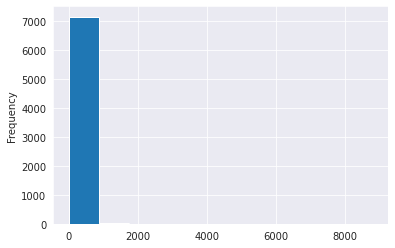

In [26]:
cleaned_df["price"].plot.hist();

In [27]:
find_outliers(cleaned_df, column="price")

{'low': [],
 'high': [354.0,
  355.0,
  357.0,
  358.0,
  359.0,
  360.0,
  361.0,
  363.0,
  364.0,
  365.0,
  366.0,
  368.0,
  369.0,
  372.0,
  373.0,
  374.0,
  375.0,
  377.0,
  379.0,
  380.0,
  381.0,
  382.0,
  383.0,
  384.0,
  385.0,
  386.0,
  387.0,
  390.0,
  392.0,
  393.0,
  394.0,
  395.0,
  397.0,
  398.0,
  399.0,
  400.0,
  401.0,
  402.0,
  408.0,
  411.0,
  413.0,
  414.0,
  415.0,
  416.0,
  420.0,
  421.0,
  422.0,
  425.0,
  426.0,
  427.0,
  428.0,
  429.0,
  430.0,
  431.0,
  434.0,
  435.0,
  440.0,
  443.0,
  444.0,
  445.0,
  448.0,
  449.0,
  450.0,
  451.0,
  455.0,
  459.0,
  460.0,
  465.0,
  466.0,
  470.0,
  471.0,
  472.0,
  475.0,
  476.0,
  478.0,
  479.0,
  480.0,
  485.0,
  486.0,
  487.0,
  488.0,
  490.0,
  495.0,
  499.0,
  500.0,
  513.0,
  514.0,
  516.0,
  521.0,
  524.0,
  525.0,
  528.0,
  529.0,
  534.0,
  535.0,
  540.0,
  545.0,
  550.0,
  555.0,
  557.0,
  564.0,
  567.0,
  568.0,
  575.0,
  580.0,
  585.0,
  587.0,
  590.0,
  594.0,

<AxesSubplot:>

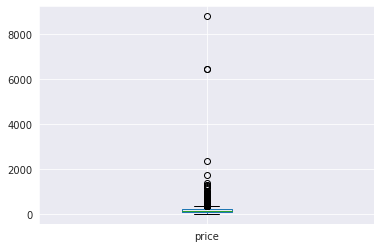

In [28]:
cleaned_df.boxplot(column=["price"])

# Final Look at the Data Distribution

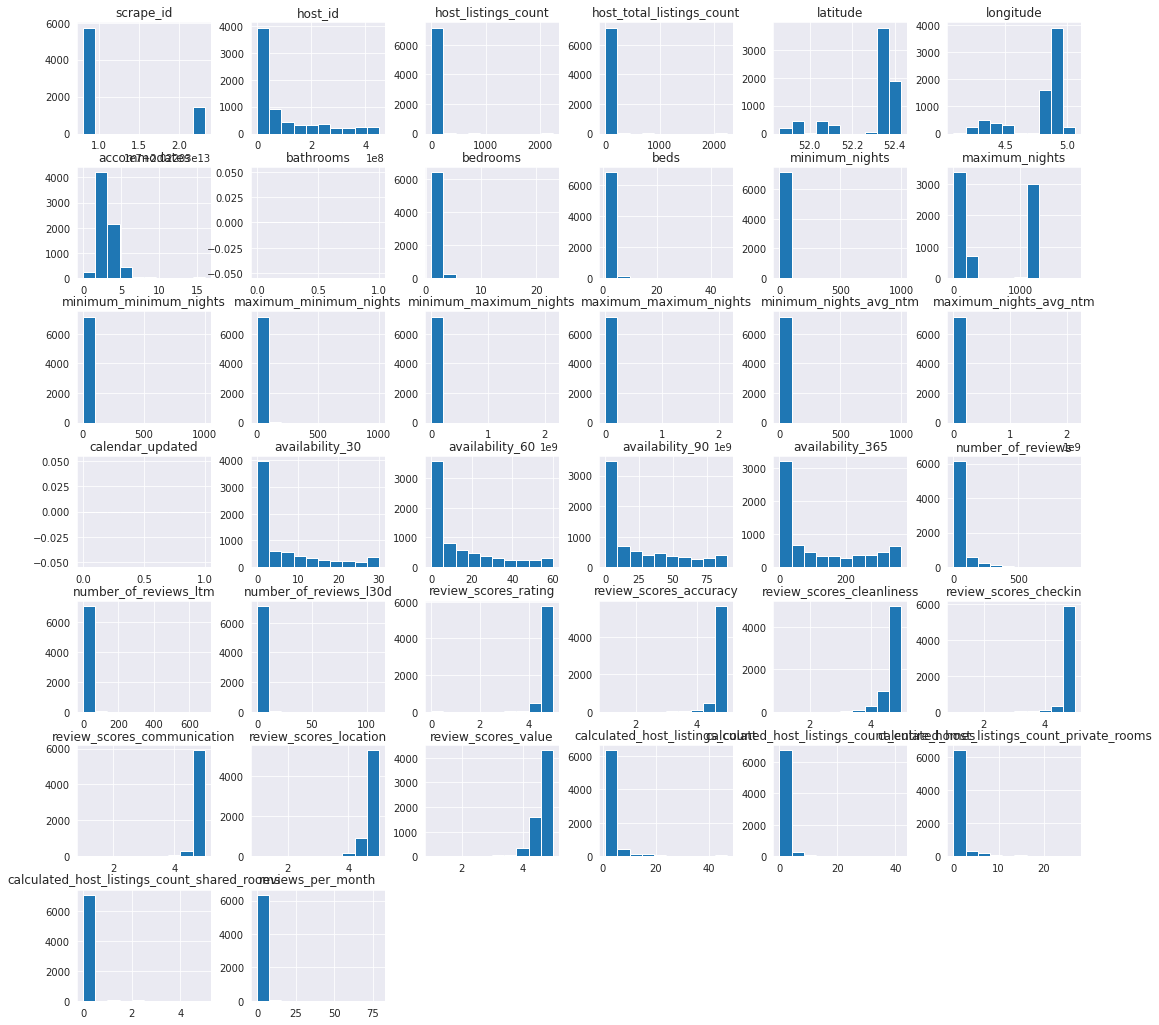

In [29]:
df.hist(figsize=(18, 18));

In [31]:
df.isna().sum()

listing_url                                       0
scrape_id                                         0
last_scraped                                      0
name                                              0
description                                      24
                                               ... 
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               793
city                                              0
Length: 74, dtype: int64

# Export Data

Everything looks good. Let's save our progress.

In [30]:
cleaned_df.to_csv(Path("data") / "data.csv")